In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

In [2]:
# Parameters for the true underlying relationship
true_w = 2
true_b = 1
m = 10  # Number of data points

In [3]:
# Generate random x values
np.random.seed(0)  # For reproducibility
x = np.random.rand(m) * 10  # Random values between 0 and 10

In [4]:
# Generate corresponding y values with some noise
y = true_w * x + true_b + np.random.randn(m)

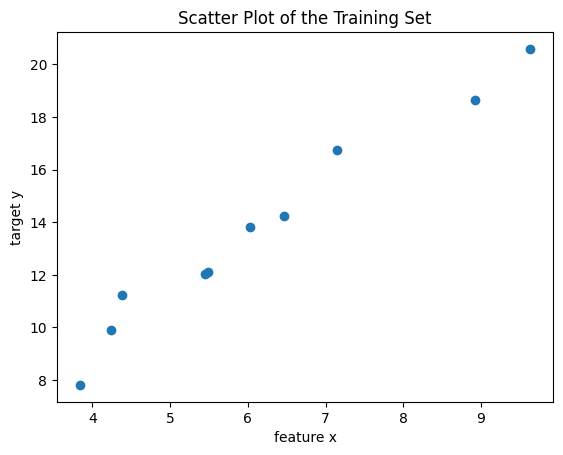

In [5]:
# Scatter plot of the training set
plt.scatter(x, y)
plt.xlabel('feature x')
plt.ylabel('target y')
plt.title('Scatter Plot of the Training Set')
plt.savefig('figures/01_scatter_plot.png')  # Save the plot
plt.show()

In [6]:
# Try guesses for the parameters
w_try = [2, 1.5, -1]
b_try = [1, 0.5, -1]

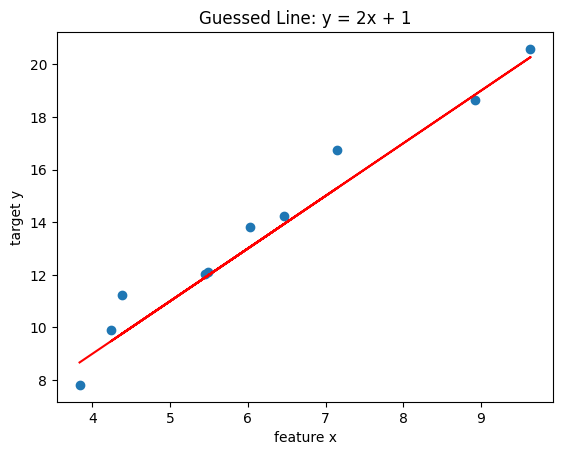

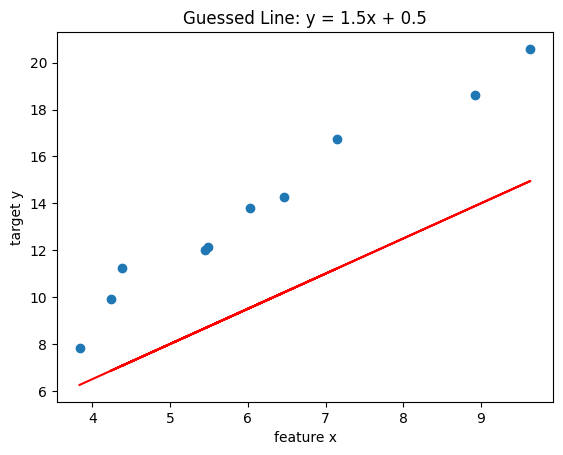

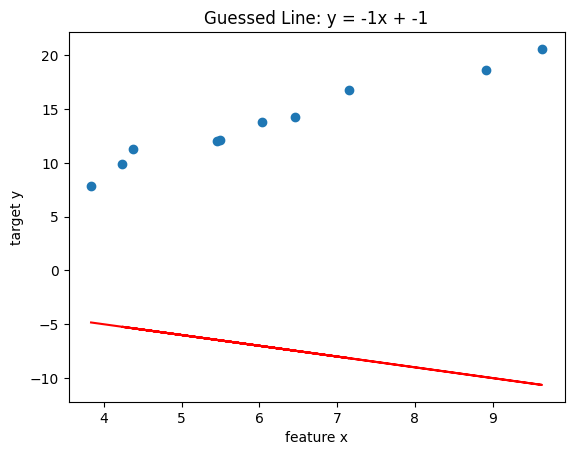

In [7]:
# Visualize guessed lines on top of scatter plot
for k in range(3):
    plt.scatter(x, y)
    plt.plot(x, w_try[k] * x + b_try[k], color = 'red')
    plt.xlabel('feature x')
    plt.ylabel('target y')
    plt.title(f'Guessed Line: y = {w_try[k]}x + {b_try[k]}')
    plt.savefig(f'figures/02_guessed_line_{k}.png')
    plt.show()

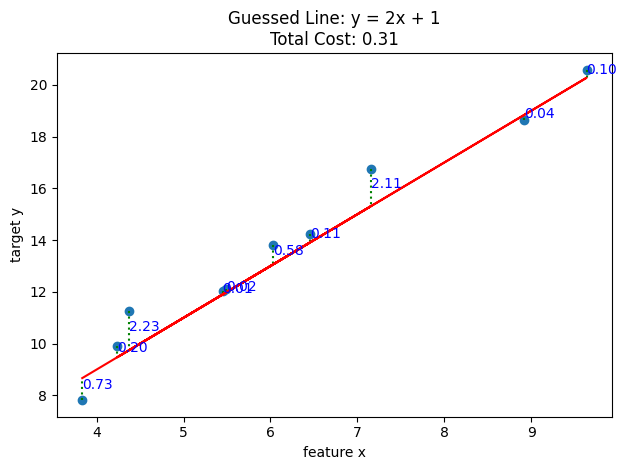

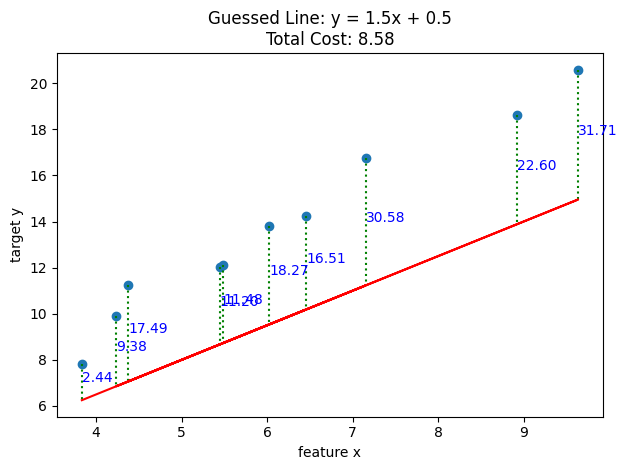

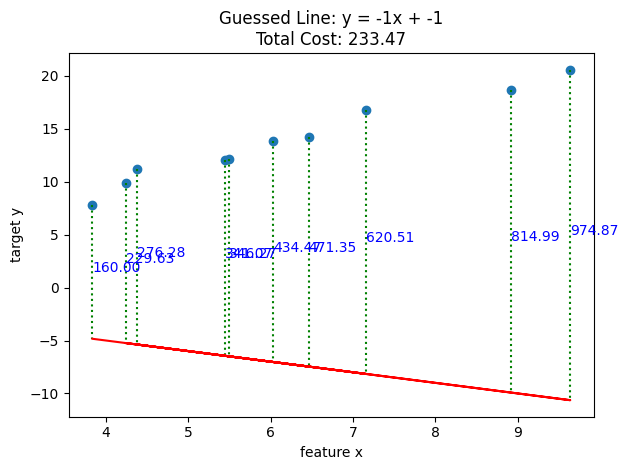

In [8]:
# Plot with squared error costs
for k in range(3):
    total_cost = 0
    for xi, yi in zip(x, y):
        yi_pred = w_try[k] * xi + b_try[k]
        plt.plot([xi, xi], [yi, yi_pred], color='green', linestyle='dotted')
        squared_error = (yi - yi_pred) ** 2
        total_cost += squared_error
        plt.text(xi, (yi + yi_pred) / 2, f'{squared_error:.2f}', color='blue')
    total_cost /= (2 * m)
    
    plt.scatter(x, y)
    plt.plot(x, w_try[k] * x + b_try[k], color='red')
    
    plt.xlabel('feature x')
    plt.ylabel('target y')
    plt.title(f'Guessed Line: y = {w_try[k]}x + {b_try[k]}\nTotal Cost: {total_cost:.2f}')
    plt.tight_layout()
    plt.savefig(f'figures/03_plot_with_cost_{k}.png')
    plt.show()

In [9]:
# Generate a grid of w and b values
w_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)

In [10]:
# Cost Function
def compute_cost(x, y, w, b):
    m = len(y)
    total_cost = 0
    for xi, yi in zip(x, y):
        total_cost += (yi - (w * xi + b)) ** 2
    return total_cost / (2 * m)

In [11]:
# Compute the cost for each pair (w, b)
Z = np.array([[compute_cost(x, y, w, b) for w in w_vals] for b in b_vals])

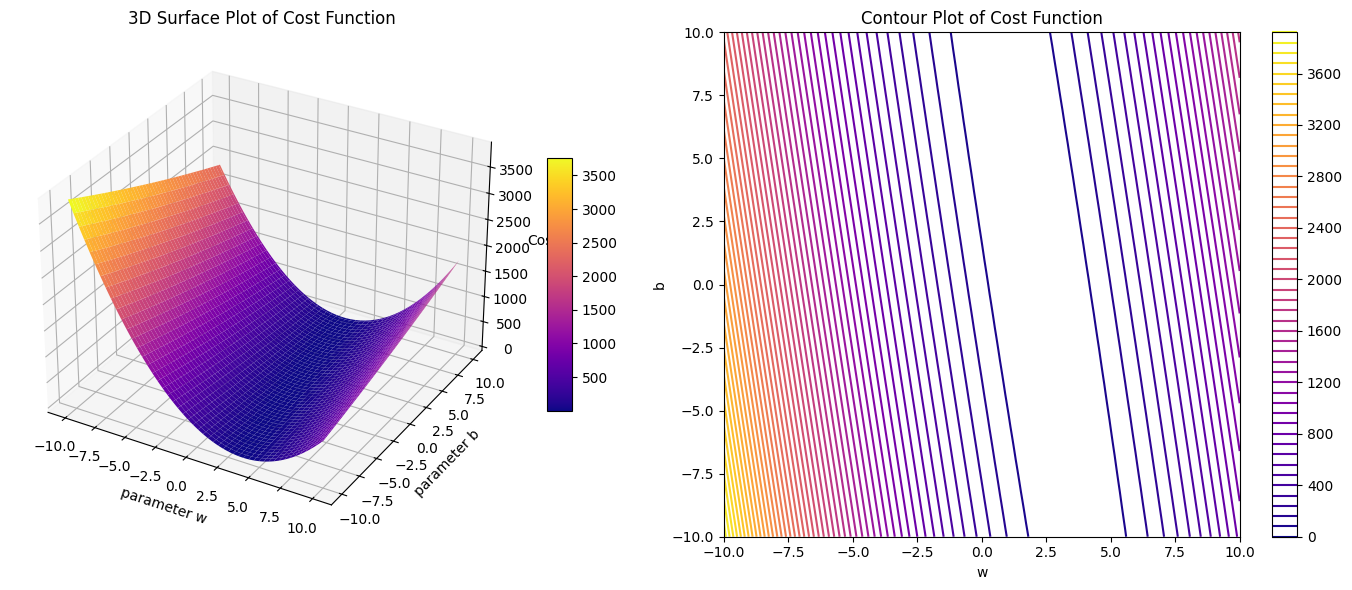

In [12]:
# Create the 3D surface plot with contour
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W, B, Z, cmap='plasma')
ax1.set_xlabel('parameter w')
ax1.set_ylabel('parameter b')
ax1.set_zlabel('Cost')
ax1.set_title('3D Surface Plot of Cost Function')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Create the contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(W, B, Z, levels=50, cmap='plasma')
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.set_title('Contour Plot of Cost Function')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.savefig('figures/04_3d_surface_with_contour.png')
plt.show()

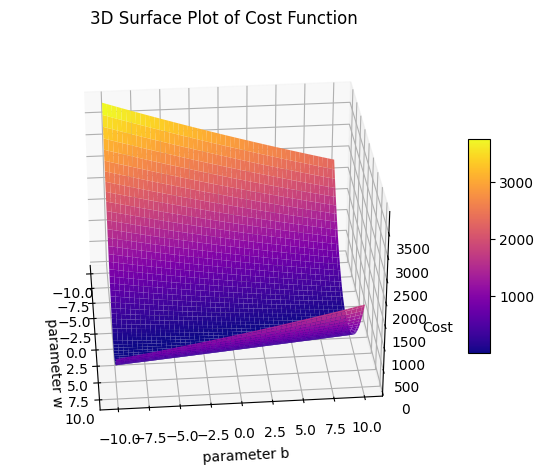

In [13]:
# Recreate 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, Z, cmap='plasma')
ax.set_xlabel('parameter w')
ax.set_ylabel('parameter b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost Function')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.tight_layout()

# Save frames for GIF
filenames = []
for angle in range(0, 360, 5):
    ax.view_init(30, angle)
    filename = f'frame_{angle}.png'
    filenames.append(filename)
    plt.savefig(filename)

# Create a GIF
with imageio.get_writer('figures/05_3d_surface_plot.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Clean up the files
for filename in filenames:
    os.remove(filename)

In [14]:
# Gradient function
def compute_gradients(x, y, w, b):
    m = len(y)
    dj_dw = 0
    dj_db = 0
    for xi, yi in zip(x, y):
        error = (yi - (w * xi + b))
        dj_dw += -xi * error
        dj_db += -error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [15]:
# Compute the gradients for each pair (w, b)
U = np.zeros_like(W)
V = np.zeros_like(B)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        dj_dw, dj_db = compute_gradients(x, y, W[i, j], B[i, j])
        U[i, j] = dj_dw
        V[i, j] = dj_db

In [16]:
# Rescale grid for quiver plot
w_vals = np.linspace(-10, 10, 20)
b_vals = np.linspace(-10, 10, 20)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.array([[compute_cost(x, y, w, b) for w in w_vals] for b in b_vals])

In [17]:
# Compute the gradients for each pair (w, b)
U = np.zeros_like(W)
V = np.zeros_like(B)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        dj_dw, dj_db = compute_gradients(x, y, W[i, j], B[i, j])
        U[i, j] = dj_dw
        V[i, j] = dj_db

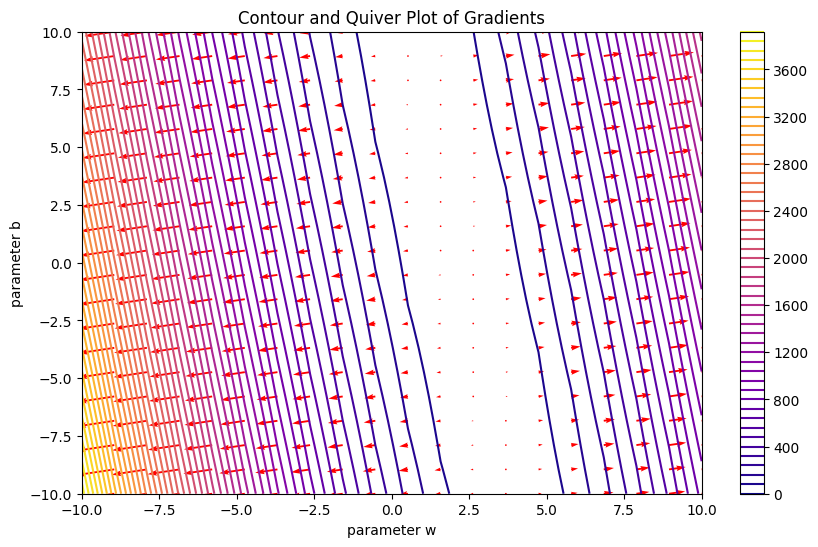

In [18]:
# Plot the contour plot and quiver plot
fig, ax = plt.subplots(figsize=(10,6))
contour = ax.contour(W, B, Z, levels=50, cmap='plasma')
quiver = ax.quiver(W, B, U, V, color='red')

ax.set_xlabel('parameter w')
ax.set_ylabel('parameter b')
ax.set_title('Contour and Quiver Plot of Gradients')
fig.colorbar(contour, ax=ax)

plt.savefig('figures/06_quiver_plot.png')  # Save the plot
plt.show()

In [19]:
# Batch Gradient Descent function
def batch_gradient_descent(x, y, w, b, alpha, num_iterations, cost_func, grad_func):
    cost_history = []
    params_history = []

    for i in range(num_iterations):
        # Compute gradients
        dj_dw, dj_db = grad_func(x, y, w, b)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Compute cost
        cost = cost_func(x, y, w, b)

        # Record history
        cost_history.append(cost)
        params_history.append((w, b))

    return w, b, cost_history, params_history

In [20]:
# Parameters for gradient descent
alpha = 0.01
num_iterations = 10000

In [21]:
# Initial guess for the parameters
w_initial = -10.0
b_initial = 10.0

In [22]:
# Run the gradient descent algorithm
final_w, final_b, cost_history, params_history = batch_gradient_descent(
    x, y, w_initial, b_initial, alpha, num_iterations, compute_cost, compute_gradients
)

In [23]:
# Print final parameters
print(f"Final parameters: w = {final_w:.5f}, b = {final_b:.5f}")

Final parameters: w = 2.00707, b = 1.35735


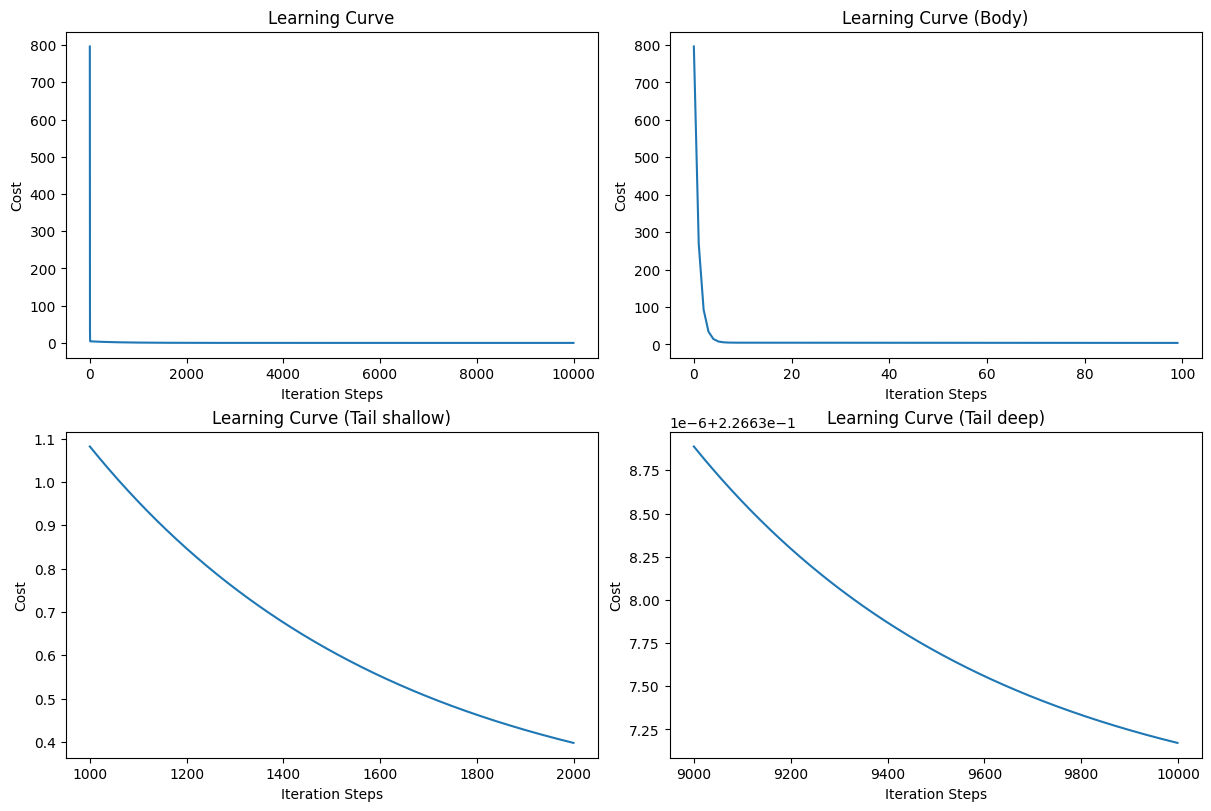

In [24]:
# Plot cost versus iteration steps
fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (12, 8))
ax[0, 0].plot(cost_history, label = 'cost')
ax[0, 1].plot(np.arange(len(cost_history[:100])), cost_history[:100])
ax[1, 0].plot(1000 + np.arange(len(cost_history[1000:2000])), cost_history[1000:2000])
ax[1, 1].plot(9000 + np.arange(len(cost_history[9000:])), cost_history[9000:])

ax[0, 0].set_title('Learning Curve')
ax[0, 1].set_title('Learning Curve (Body)')
ax[1, 0].set_title('Learning Curve (Tail shallow)')
ax[1, 1].set_title('Learning Curve (Tail deep)')
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel('Iteration Steps')
        ax[i,j].set_ylabel('Cost')

# plt.legend()
plt.savefig('figures/07_learning_curve.png')
plt.show()

In [25]:
# Print Final Cost
print(f"Final Cost: {cost_history[-1]:.10f}")

Final Cost: 0.2266371716


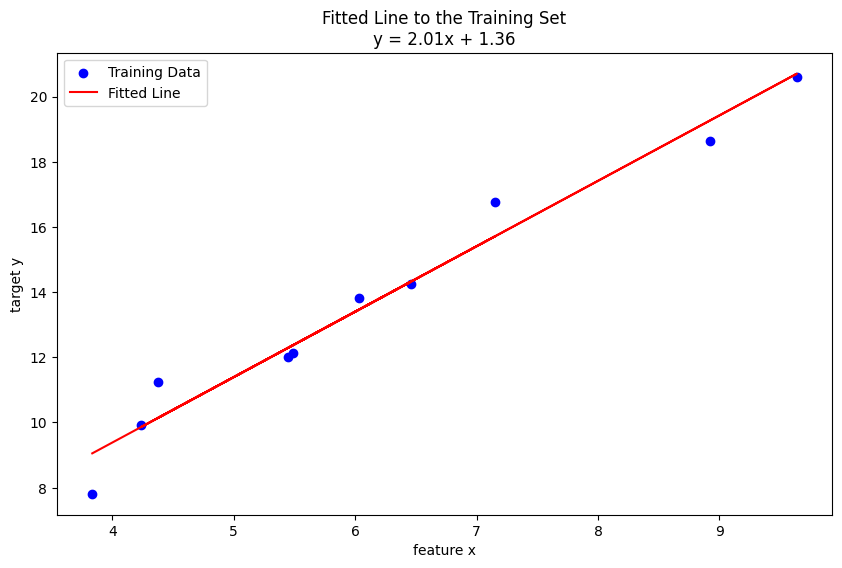

In [26]:
# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x, final_w * x + final_b, color='red', label='Fitted Line')
plt.xlabel('feature x')
plt.ylabel('target y')
plt.title(f'Fitted Line to the Training Set\ny = {final_w:.2f}x + {final_b:.2f}')
plt.legend()
plt.savefig('figures/08_fitted_line.png')
plt.show()

In [27]:
# Rescale grid for contour plot
w_vals = np.linspace(-15, 15, 100)
b_vals = np.linspace(0, 15, 100)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.array([[compute_cost(x, y, w, b) for w in w_vals] for b in b_vals])

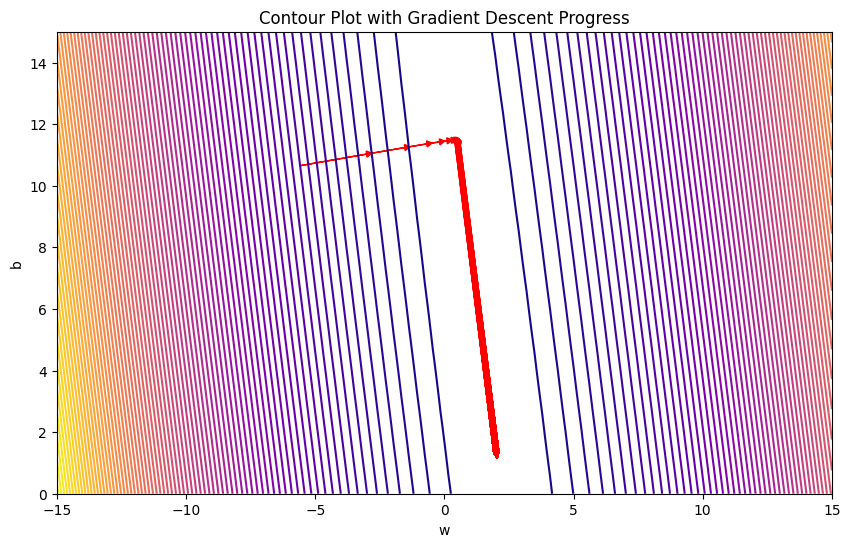

In [28]:
# Plot the contour plot
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contour(W, B, Z, levels=100, cmap='plasma')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_title('Contour Plot with Gradient Descent Progress')

# Plot the progress of the algorithm as arrows
params_array = np.array(params_history)
w_hist = params_array[:, 0]
b_hist = params_array[:, 1]
# ax.plot(w_hist, b_hist, marker='x', color='r')  # Plot the parameter history

for i in range(1, len(w_hist)):
    ax.arrow(w_hist[i-1], b_hist[i-1], w_hist[i]-w_hist[i-1], b_hist[i]-b_hist[i-1],
             head_width=0.2, head_length=0.2, fc='r', ec='r')

plt.savefig('figures/09_contour_with_progress.png')
plt.show()